# Load Data

* Energy Cons - EJ
* Energy Cons Fuel 2022 - EJ
* Oil Reserves - BN BL
* Oil Production - K/BL/D
* Liquids Consumption - K/BL/D
* Product Regional Consumption - K/BL/D
* Spot Crude Prices - USD/BL
* Capacity - K/BL/D
* Throughput - K/BL/D
* Margins - USD/BL
* Crude Import Export - K/BL/D
* Crude Movement 2022 - MN Tonnes
* Product Movement 2022 - MN Tonnes
* Platts Periodic Table - K/BL/D

    

In [170]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'cyan', 'magenta', 'yellow']

region_to_countries = {

    'NA':
                                 ['USA', 'Canada', 'Mexico', 'US'],
    'SA': 
                                ['Argentina', 'Brazil', 'Bolivia' ,'Chile', 'Colombia', 'Ecuador', 'Peru', 'Trinidad & Tobago', 'Venezuela', 'Central America', 'Other Caribbean', 'Other South America', 'Other S. & Cent. America', 
                                 'S. & Cent. America', 'Curacao', 'Netherlands Antilles', 'Other Americas'],

    'EU':                   [
                                'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
                                'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
                                'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
                                'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
                                'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Other Europe',
                                'United Kingdom', 'Europe', 'European Union', 'Rest of Europe', 'Other EU', 'UK'
                                ],
    'CIS': 
                                ['Azerbaijan','Belarus', 'Kazakhstan','Russian Federation', 'Turkmenistan', 'USSR','Uzbekistan', 'Other CIS', 'CIS', 'Russia'],
    'APAC': 
                                ['China', 'Japan', 'India', 'Australia', 'Brunei','China','Indonesia','Malaysia','Thailand','Vietnam','Other Asia Pacific', 'Bangladesh','China Hong Kong SAR',
                                 'New Zealand', 'Philippines', 'Pakistan', 'South Korea', 'Sri Lanka', 'Taiwan', 'Myanmar','Papua New Guinea','Brunei', 'Singapore','Other Asia', 'OECD Asia', 'Australasia'],
    'AF': 
                                ['Algeria', 'Egypt','Morocco', 'South Africa','Eastern Africa', 'Middle Africa', 'Western Africa', 'Other Northern Africa', 'Other Southern Africa', 'Congo', 'Ghana', 'Guyana',
                                 'Angola', 'Chad', 'Republic of Congo','Egypt', 'Equatorial Guinea','Gabon', 'Libya','Nigeria','South Sudan','Sudan','Tunisia','Other Africa', 'Africa', 'North Africa','West Africa', 'East & S. Africa'],
    'ME': 
                                ['Iran', 'Iraq','Israel', 'Kuwait','Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates','Other Middle East', 'Bahrain', 'Yemen', 'Syria', 'Other Middle East & Africa', 'Middle East', 'UAE']
}


def map_region_index(country):
    for region, countries in region_to_countries.items():
        if country in countries:
            return region
    return 'Unknown'

def map_region_column(country):
    for region, countries in region_to_countries.items():
        if country in countries:
            return (region, country)
    return (None, country) 


oil_tabs = ["Energy Cons", "Energy Cons Fuel 2022", "Oil Reserves", "Oil Production", "Liquids Consumption", "Product Regional Consumption", 
                    "Spot Crude Prices", "Capacity", "Throughput", "Margins", "Crude Import Export", "Crude Movement 2022", "Product Movement 2022"]

gas_tabs = ["Gas Reserves", "Gas Production", "Gas Consumption", "Gas Prices", "Gas Imports Exports", "LNG Exports", "LNG Imports","LNG Trade Movements" ,"Pipeline Trade Movements"]

oil_path = 'BP-Statistical-Review-2022-Crude.xlsx'
gas_path = 'BP-Statistical-Review-2022-Gas.xlsx'

def create_dfs(fp, tabs, load_pickle=False):

    if 'Crude'in fp:
        name = 'crude'
    if 'Gas' in fp:
        name = 'gas'

    if load_pickle:
        with open(f'{name}.pkl', 'rb') as handle:
            dfs = pickle.load(handle)
    else:
        xls = pd.ExcelFile(fp)
        dfs = {}
        for sheet_name in xls.sheet_names:
            df = xls.parse(sheet_name, header=0)
            if df.columns[0] == 'Country':        
                df['Continent'] = df['Country'].apply(map_region_index)
                # if 'Movement' in sheet_name:
                #     df.columns = df.columns.map(map_region_column)
                if 'Product' in df.columns:
                    df.set_index(['Continent', 'Country', 'Product'], inplace=True)
                elif 'Type' in df.columns:
                    df.set_index(['Continent', 'Country', 'Type'], inplace=True)
                else:
                    df.set_index(['Continent', 'Country'], inplace=True)
            elif 'Region' in df.columns:
                df['Continent'] = df['Region'].apply(map_region_index)
                if 'Type' in df.columns:
                    df.set_index(['Region','Type'], inplace=True)
                else:
                    df.set_index(['Continent','Region'], inplace=True)
            elif df.columns[0] == 'Year':
                df.set_index(['Year'], inplace=True)
                
    
            if 'Thousand barrels daily' in df.columns:
                df.drop(columns=['Thousand barrels daily'],inplace=True)
            dfs[sheet_name] = df

        with open(f'{name}.pkl', 'wb') as handle:
            pickle.dump(dfs, handle)

    for tab in tabs:
        var_name = tab.lower().replace(' ', '_')
        globals()[var_name] = dfs[tab]

    return 0



create_dfs(oil_path, oil_tabs, load_pickle=False)
create_dfs(gas_path, gas_tabs, load_pickle=False)


product_movement_2022.columns = product_movement_2022.columns.map(map_region_column)
crude_movement_2022.columns = crude_movement_2022.columns.map(map_region_column)

product_movement_2022 = product_movement_2022.replace(0, np.NaN)
crude_movement_2022 = crude_movement_2022.replace(0, np.NaN)



# Energy Consumption

## 1960-2022 by Continent

* Why did APAC rise while CIS drop?
* Why US/Europe relatively stable over time?

Text(0.5, 1.0, 'Energy consumption history in ExaJoules/Year 1960-2022')

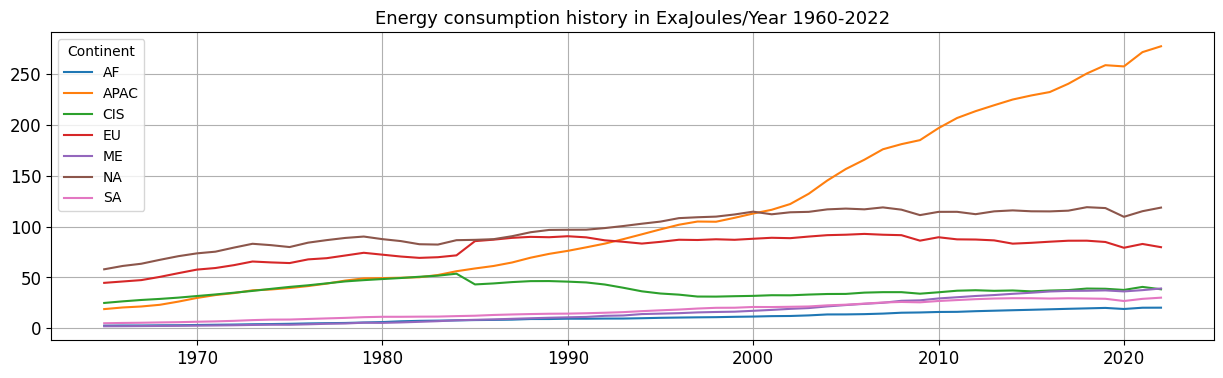

In [171]:
ax = energy_cons.T.groupby(level=0,axis=1).sum().plot(figsize=(15,4), title='Energy consumption history in ExaJoules/Year 1960-2022', grid=True,fontsize=12)
# Increase font size of various plot elements
ax.set_title('Energy consumption history in ExaJoules/Year 1960-2022', fontsize=13)


## 1960-2022 APAC

* What accounts for growth rates of China and India from 2000s onward?

Text(0.5, 1.0, 'Energy consumption history in ExaJoules 1960-2022 APAC')

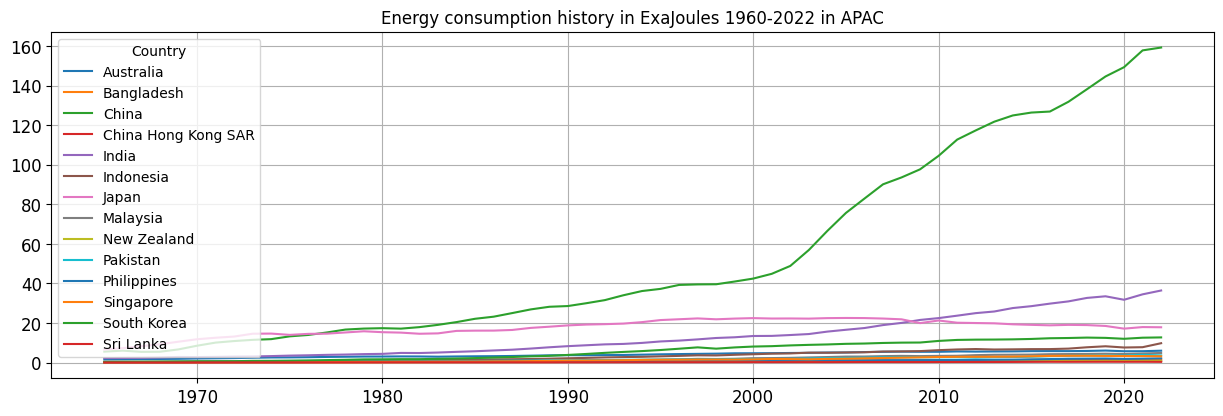

In [172]:
energy_cons.T['APAC'].iloc[:,:-4].plot(figsize=(15,4.5), title='Energy consumption history in ExaJoules 1960-2022 in APAC', grid=True,fontsize=12)

ax.set_title('Energy consumption history in ExaJoules 1960-2022 APAC', fontsize=13)


## 2022 Top 10

Text(0, 0.5, '')

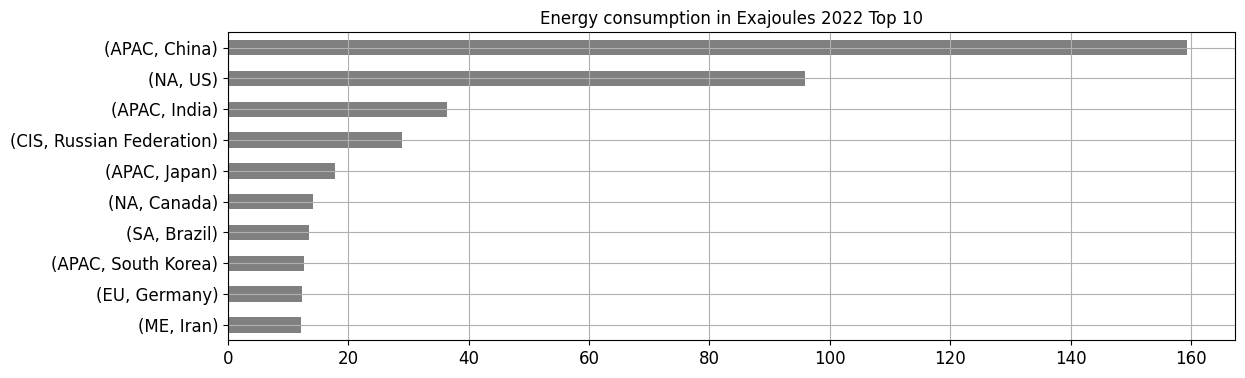

In [173]:
ax= energy_cons.T.iloc[-1].sort_values()[-10:].plot(kind='barh', color='grey',figsize=(13,4), title='Energy consumption in Exajoules 2022 Top 10', rot=0,grid=True, fontsize=12)
ax.set_ylabel(None)

## 2022 by Source by Continent

* Why do different continents exhibit different proportions of consumption?
* Why China fueled so much by coal and crude?
* Why CIS fueled so much by natural gas?

<AxesSubplot: title={'center': 'Energy consumption in 2022 in Exajoules by Source by Continent'}>

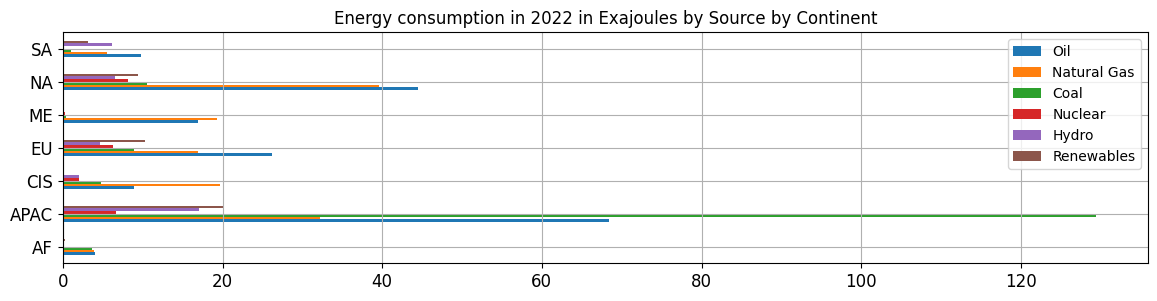

In [209]:
energy_cons_fuel_2022.groupby(level=0,axis=0).sum().plot(figsize=(14,3), title='Energy consumption in 2022 in Exajoules by Source by Continent',kind='barh',rot=0, fontsize=12,grid=True, ylabel='')

<AxesSubplot: title={'center': 'Normalized energy consumption by % in 2022 by Source by Continent'}>

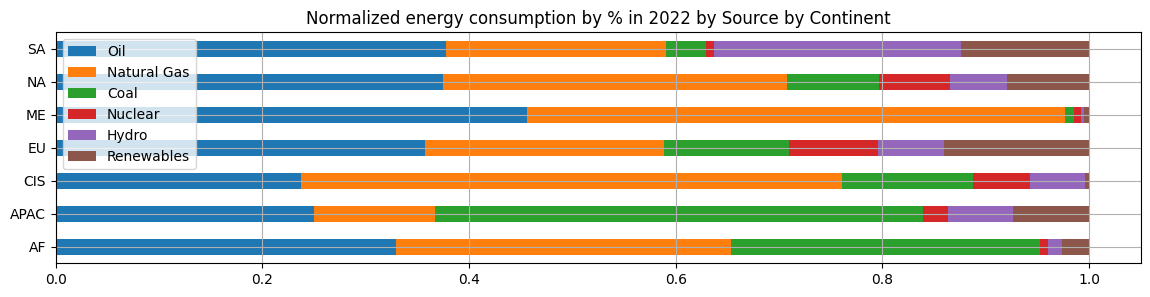

In [211]:

df = energy_cons_fuel_2022.groupby(level=0,axis=0).sum()
df.div(df.sum(axis=1),axis=0).plot(kind='barh',figsize=(14,3),rot=0,grid=True, title=r'Normalized energy consumption by % in 2022 by Source by Continent', stacked=True, ylabel='')

# Oil Reserves

* What historical events/E&P discovery maps to increase at certain times for certain continents? 
* Map to crude chemical composition.

## 1960-2022 by Continent

<AxesSubplot: title={'center': 'Oil reserves 1960-2022, BN BBLs'}>

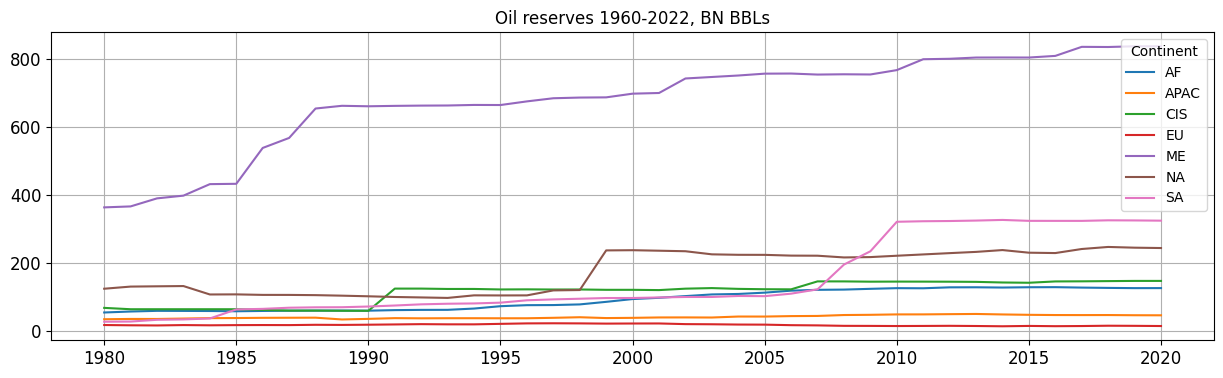

In [176]:
oil_reserves.T.groupby(level=0,axis=1).sum().plot(figsize=(15,4),grid=True, title='Oil reserves 1960-2022, BN BBLs', fontsize=12)

## 2022 by Continent

* Why does the reserve distribution look like this in 2022?

<AxesSubplot: title={'center': 'Oil reserves 2022, BN BBLs'}, ylabel='Continent'>

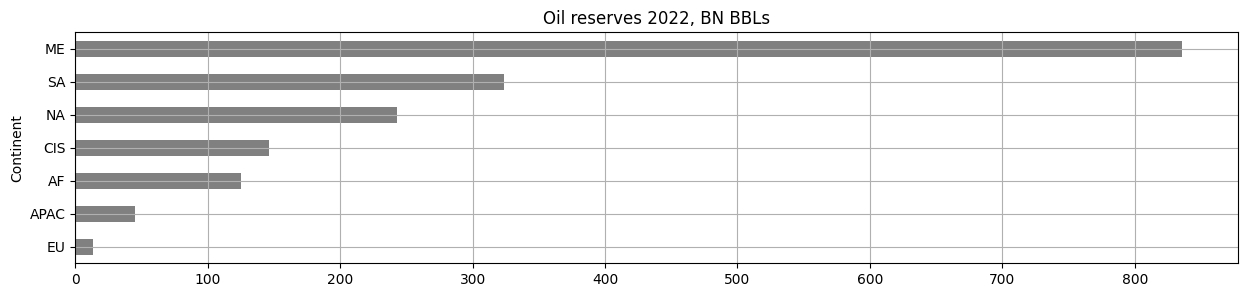

In [177]:
oil_reserves.T.groupby(level=0,axis=1).sum().iloc[-1].sort_values().plot(kind='barh', color='grey', figsize=(15,3),rot=0,grid=True, title='Oil reserves 2022, BN BBLs')

## 1980-2022 North America

* Why did Canada spike up in 1990s?
* Why did US grow so much in 2010s?

<AxesSubplot: title={'center': 'Oil reserves 1960-2022, North America'}>

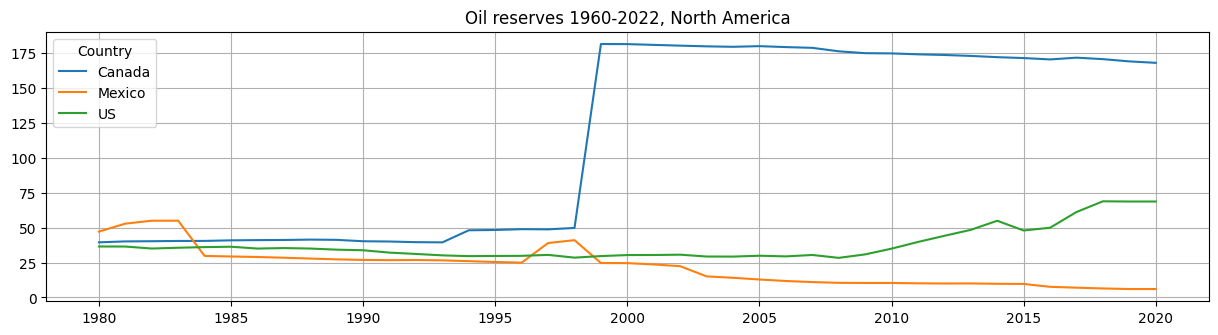

In [178]:
oil_reserves.T['NA'].plot(figsize=(15,3.5),grid=True, title='Oil reserves 1960-2022, North America')

## 1980-2022 Middle East

* Again, why and when and what for the discoveries?

<AxesSubplot: title={'center': 'Oil reserves 1960-2022, Middle East'}>

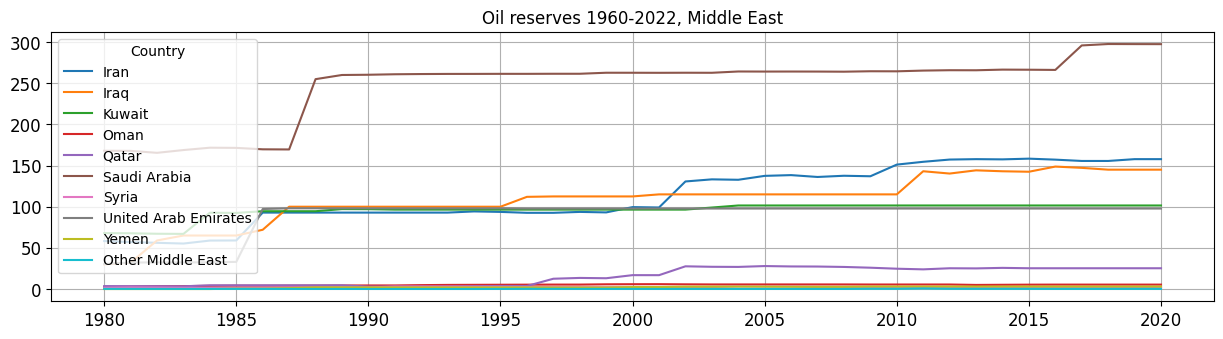

In [179]:
oil_reserves.T['ME'].plot(figsize=(15,3.5),grid=True,  title='Oil reserves 1960-2022, Middle East', fontsize=12)

## 1980-2022 South America

* Again, why and when and what for the discoveries?

<AxesSubplot: title={'center': 'Oil reserves 1960-2022, Central & South America'}>

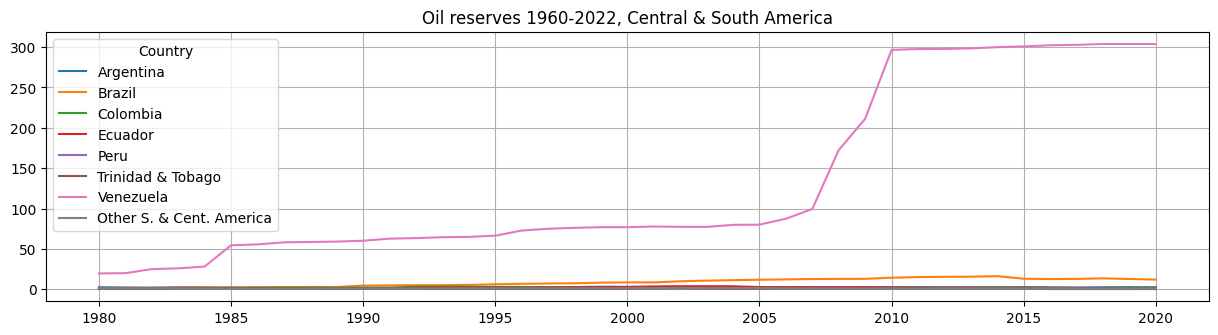

In [180]:
oil_reserves.T['SA'].plot(figsize=(15,3.5),grid=True,  title='Oil reserves 1960-2022, Central & South America')

# Oil Production

## 1960-2022 by Continent

* What and why accounts for the pattern in each region?

<AxesSubplot: title={'center': 'Production from 1960-2022, by continent, K/BBL/D'}>

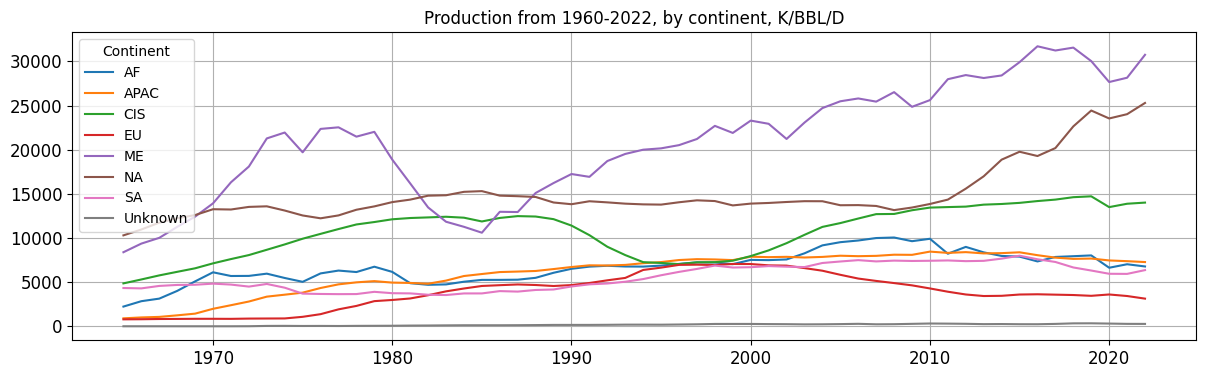

In [181]:
oil_production.T.groupby(level=0,axis=1).sum().plot(figsize=(14.5,4),grid=True, title='Production from 1960-2022, by continent, K/BBL/D', fontsize=12)

## 2022 by Country Sorted

* What and why explains why US can be so high in terms of production to total reserves ratio?

<AxesSubplot: title={'center': 'Production 2022, top countries, K/BBL/D'}>

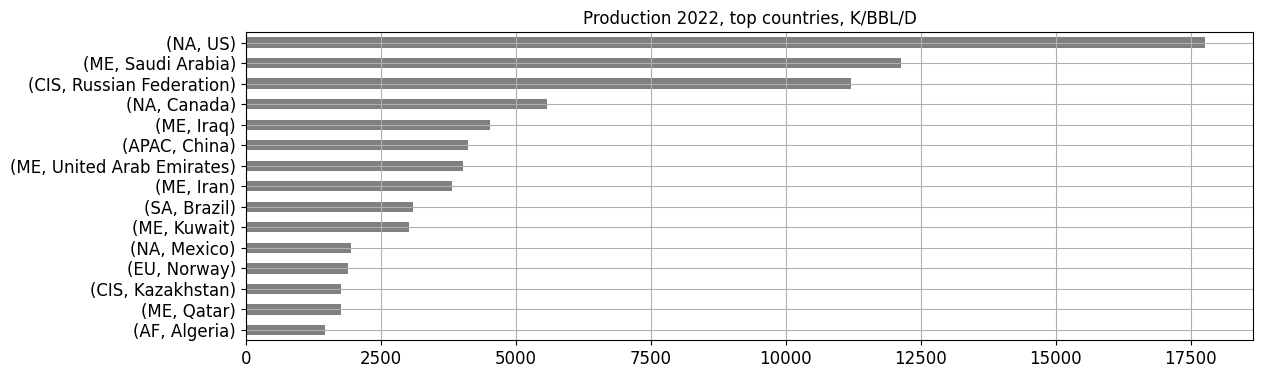

In [182]:
oil_production.T.iloc[-1].sort_values()[-15:].plot(kind='barh',figsize=(13,4),grid=True, rot=0,color='grey', title='Production 2022, top countries, K/BBL/D', fontsize=12, ylabel='')

## 1960-2022, North America

* What and why explains why US production suddenly skyrocketed in 2010?

<AxesSubplot: title={'center': 'Production 1960-2022, North America, K/BBL/D'}>

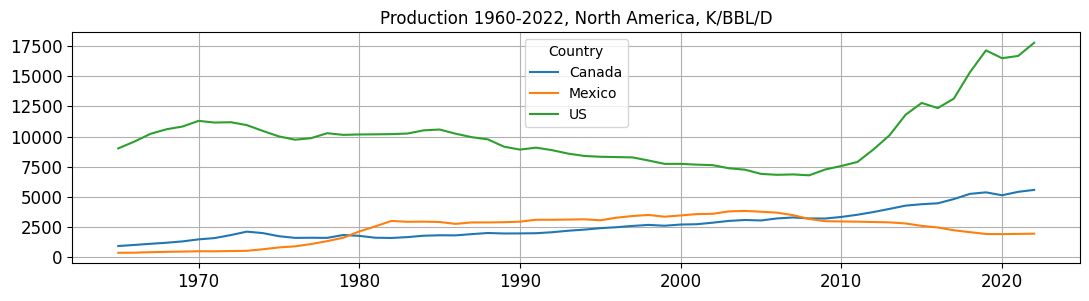

In [183]:
oil_production.T['NA'].plot(figsize=(13,3),grid=True, title='Production 1960-2022, North America, K/BBL/D', fontsize=12)

## 1960-2022 Middle East

* What and why explains why US production suddenly skyrocketed in 2010?

<AxesSubplot: title={'center': 'Production 1960-2022, Middle East, K/BBL/D'}>

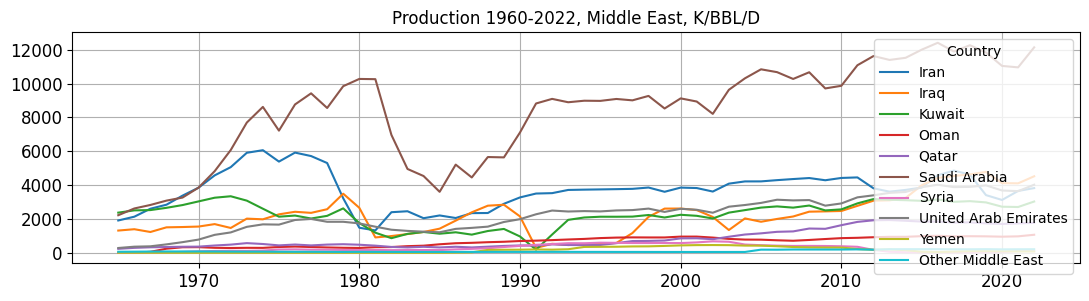

In [184]:
oil_production.T['ME'].plot(figsize=(13,3),grid=True, title='Production 1960-2022, Middle East, K/BBL/D', fontsize=12)

<AxesSubplot: >

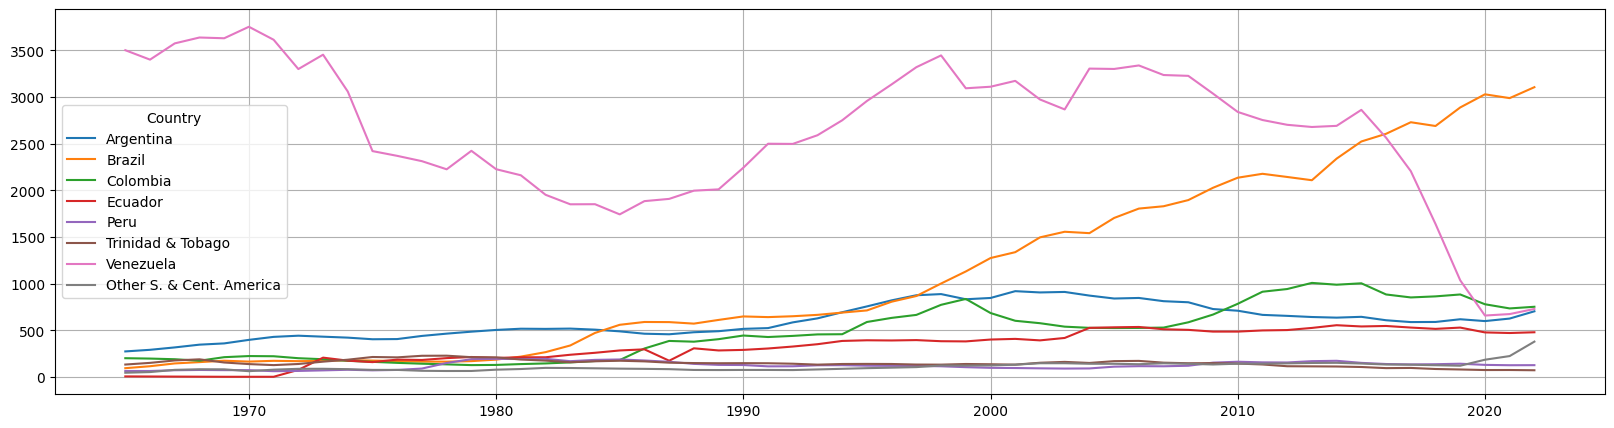

In [185]:
oil_production.T['SA'].plot(figsize=(20,5),grid=True)

# Liquids Consumption

## 1960-2022 by Continent

<AxesSubplot: title={'center': 'Product Consumption 1960-2022 K/BBL/D'}>

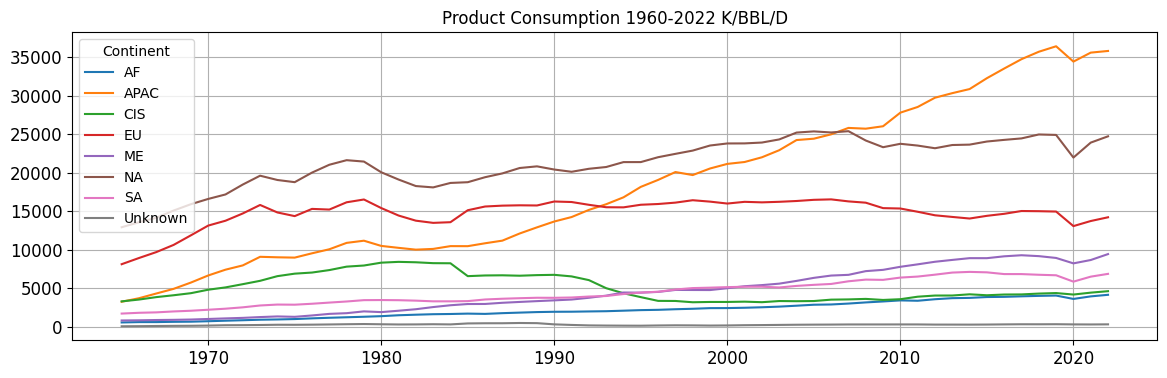

In [186]:
liquids_consumption.T.groupby(level=0,axis=1).sum().plot(figsize=(14,4), title='Product Consumption 1960-2022 K/BBL/D', grid=True,fontsize=12)

## 2022 Top 10

<AxesSubplot: title={'center': 'Top 15 Product Consumption 2022 K/BBL/D'}>

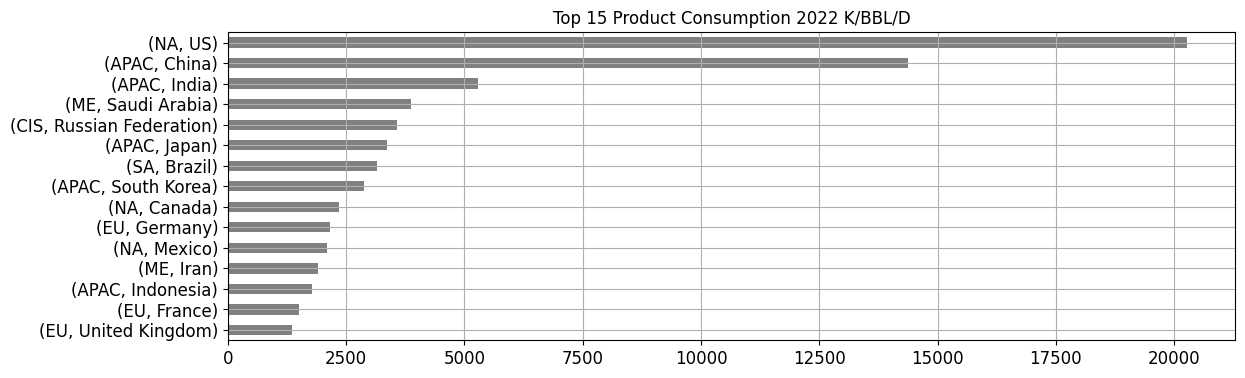

In [187]:
liquids_consumption.T.iloc[-1].dropna().sort_values()[-15:].plot(kind='barh',figsize=(13,4),grid=True, rot=0, color='grey', ylabel='',fontsize=12,title='Top 15 Product Consumption 2022 K/BBL/D')

# Product Regional Consumption

## 1960-2022, Asia Pacific

* Can we explain the breakdown of product consumption for Asia Pacific?

<AxesSubplot: title={'center': 'Product Regional Consumption APAC 2022 K/BBL/D'}>

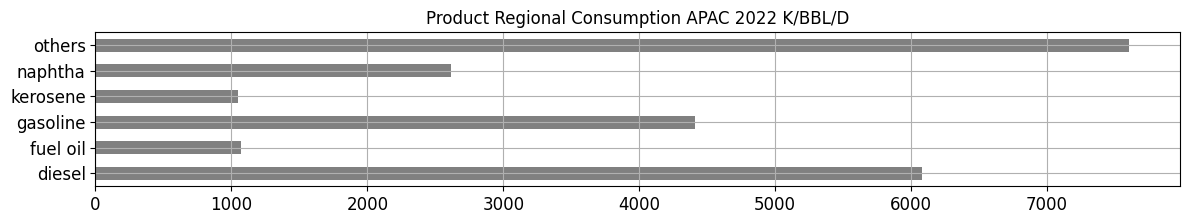

In [188]:
product_regional_consumption.groupby(level=[0,2],axis=0).sum().T['APAC'].iloc[-1].plot(kind='barh',color='grey',figsize=(14,2),title='Product Regional Consumption APAC 2022 K/BBL/D', grid=True, ylabel='', fontsize=12)

## 1960-2022, North America

* Can we explain the breakdown of product consumption for North America?

<AxesSubplot: title={'center': 'Product Regional Consumption North America'}>

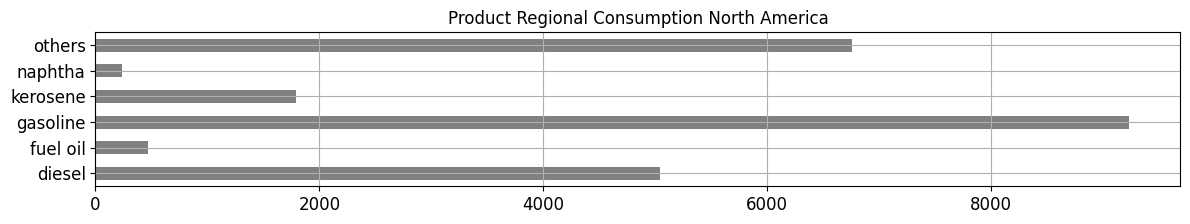

In [189]:
product_regional_consumption.groupby(level=[0,2],axis=0).sum().T['NA'].iloc[-1].plot(color='grey',figsize=(14,2),title='Product Regional Consumption North America', grid=True,kind='barh',rot=0, ylabel='',fontsize=12)

## 1960-2022, Europe

* Why is diesel the most commonly consumed in Europe?

<AxesSubplot: title={'center': 'Product Regional Consumption Europe'}>

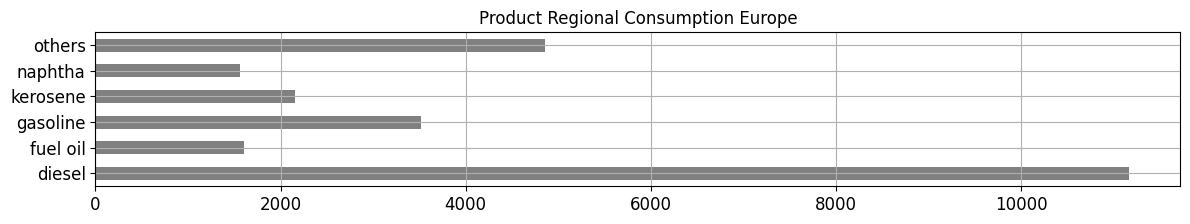

In [190]:
product_regional_consumption.groupby(level=[0,2],axis=0).sum().T['EU'].iloc[-1].plot(figsize=(14,2),title='Product Regional Consumption Europe', kind='barh', color='grey', grid=True, ylabel='',fontsize=12)

# Spot Crude Prices

* Using BP's chart, understand the recent history of prices. What/why caused the spikes/drop?

<AxesSubplot: title={'center': 'Spot Crude Prices'}, xlabel='Year'>

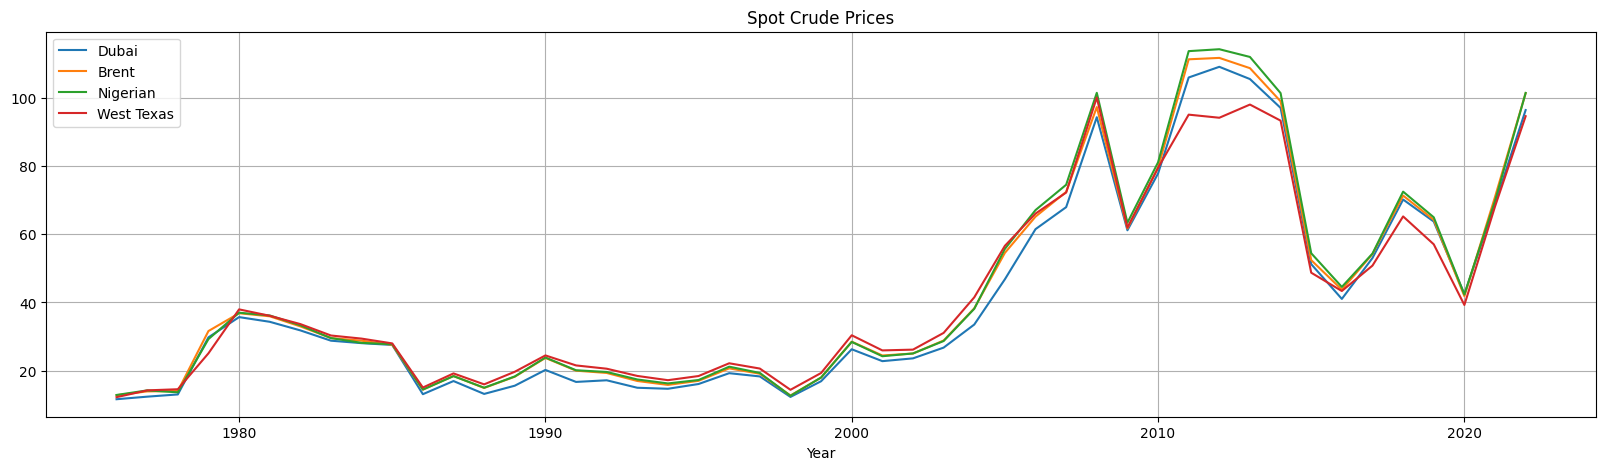

In [191]:
spot_crude_prices.iloc[4:].plot(figsize=(20,5),title='Spot Crude Prices',grid=True)

# Capacity

* Refining capacity is very constant. 
* Refineries are old and don't change much.

<AxesSubplot: title={'center': 'Capacity 2022, top countries, K/BBL/D'}>

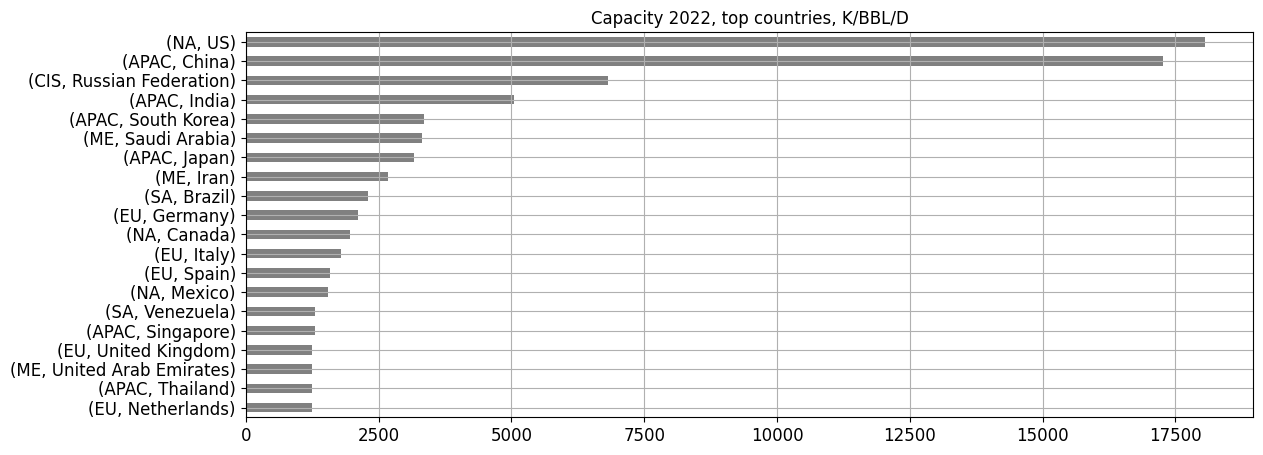

In [192]:
capacity.T.iloc[-1].sort_values()[-20:].plot(kind='barh',figsize=(13,5),grid=True, rot=0,color='grey', title='Capacity 2022, top countries, K/BBL/D', ylabel='',fontsize=12)

<AxesSubplot: title={'center': 'Capacity 2022, North America, K BBL / D'}, ylabel='Country'>

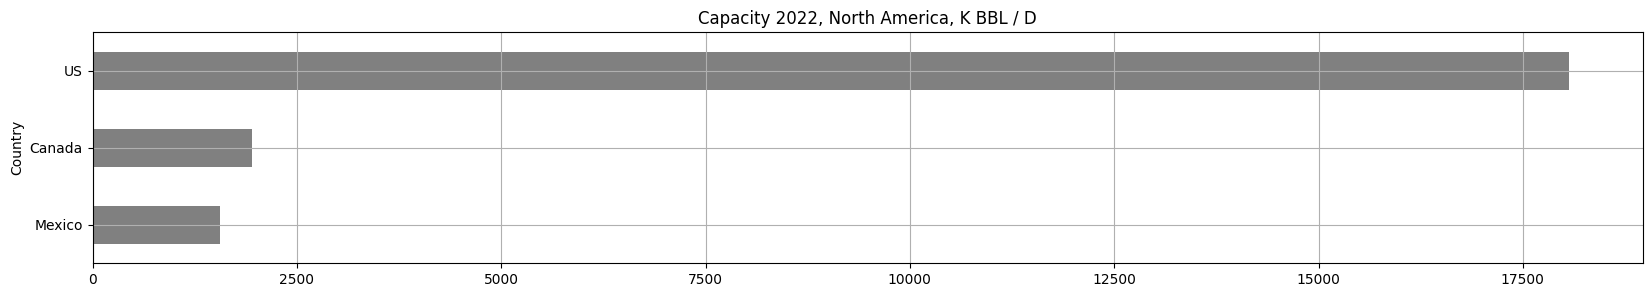

In [193]:
capacity.T['NA'].iloc[-1].sort_values().plot(figsize=(20,3),kind='barh',title='Capacity 2022, North America, K BBL / D',grid=True,color='grey')

<AxesSubplot: title={'center': 'Capacity, Europe, K BBL D'}, ylabel='Country'>

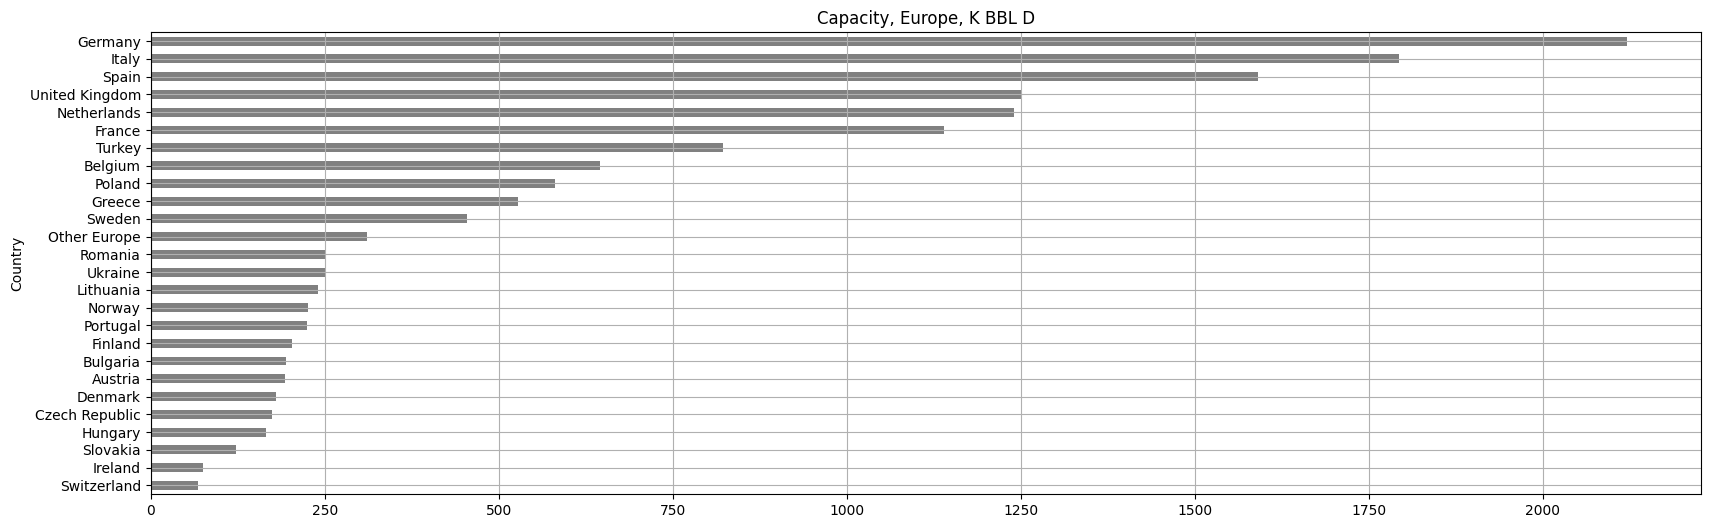

In [194]:
capacity.T['EU'].iloc[-1].sort_values().plot(figsize=(20,6),kind='barh',title='Capacity, Europe, K BBL D',rot=0,grid=True,color='grey' )

<AxesSubplot: title={'center': 'Capacity, Asia K BBL D'}, ylabel='Country'>

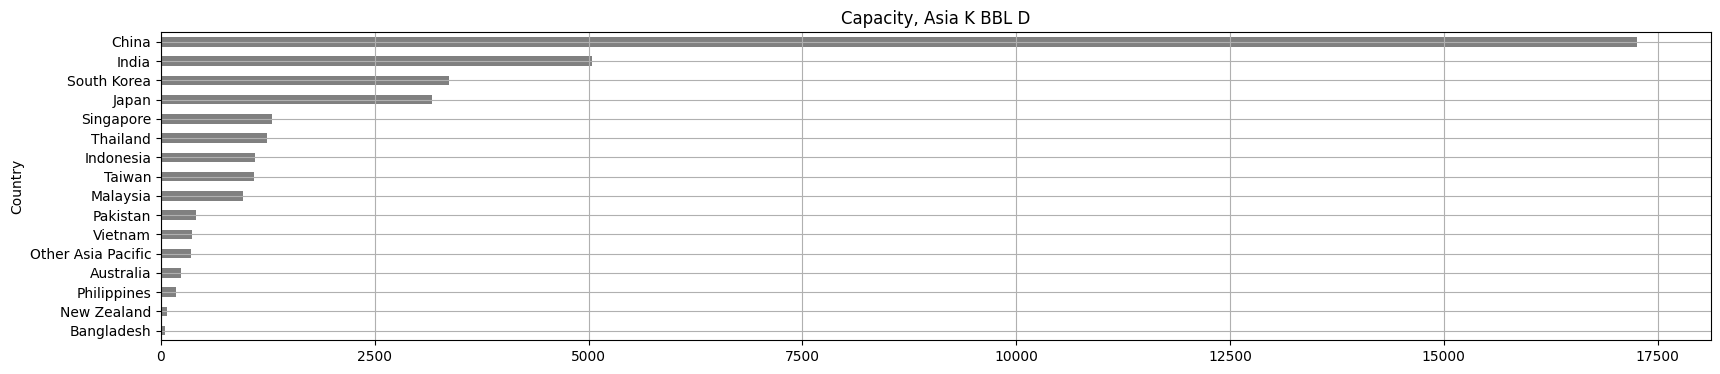

In [195]:
capacity.T['APAC'].iloc[-1].sort_values().plot(figsize=(20,4),kind='barh', color='grey',title='Capacity, Asia K BBL D',rot=0,grid=True)

<AxesSubplot: title={'center': 'Capacity, Middle East'}, ylabel='Country'>

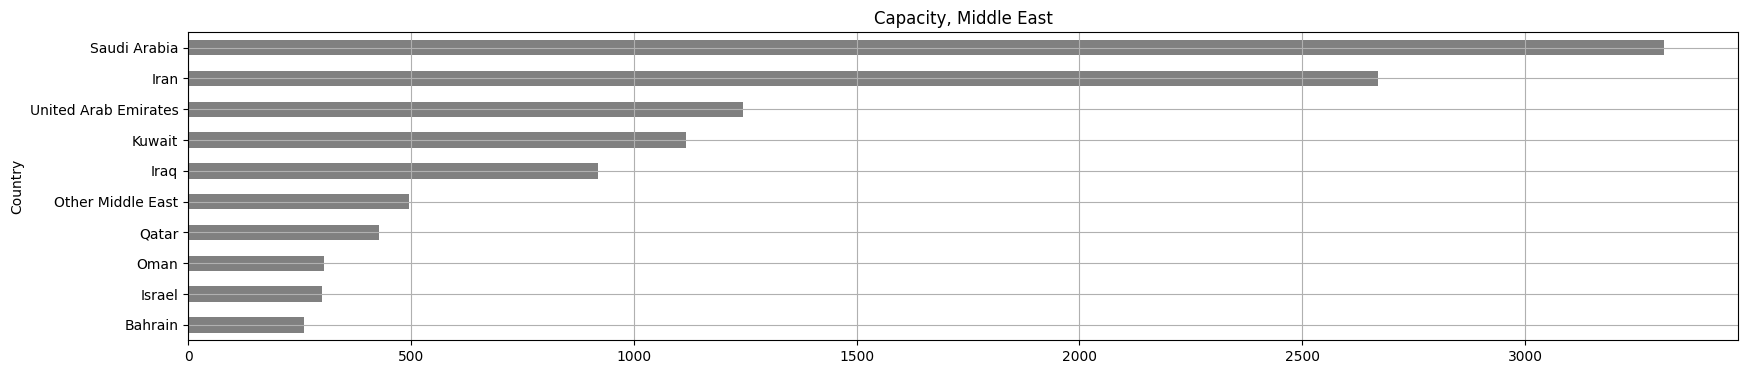

In [196]:
capacity.T['ME'].iloc[-1].sort_values().plot(figsize=(20,4),kind='barh',color='grey',title='Capacity, Middle East', rot=0,grid=True)

<AxesSubplot: title={'center': 'Capacity, Central & South America'}, ylabel='Country'>

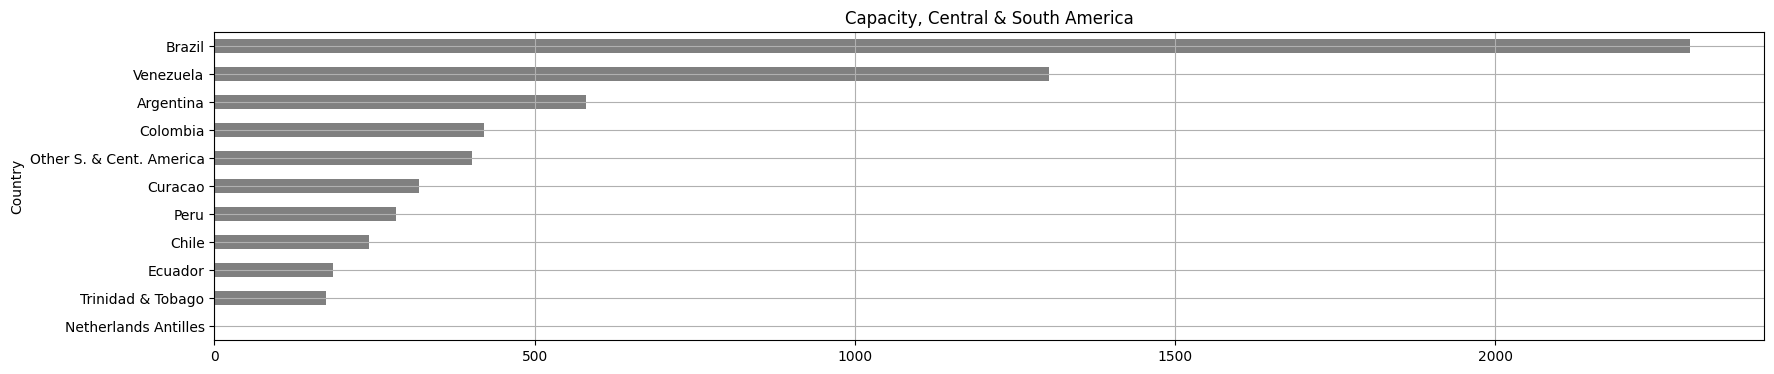

In [197]:
capacity.T['SA'].iloc[-1].sort_values().plot(figsize=(20,4),kind='barh', color='grey',title='Capacity, Central & South America', rot=0,grid=True)

# Margins

* What do these margins mean?
* What drives the price?

In [198]:
margins['Quarter'] = pd.to_datetime(margins['Quarter'])
margins.set_index('Quarter',inplace=True)

<AxesSubplot: title={'center': 'Margins'}, xlabel='Quarter'>

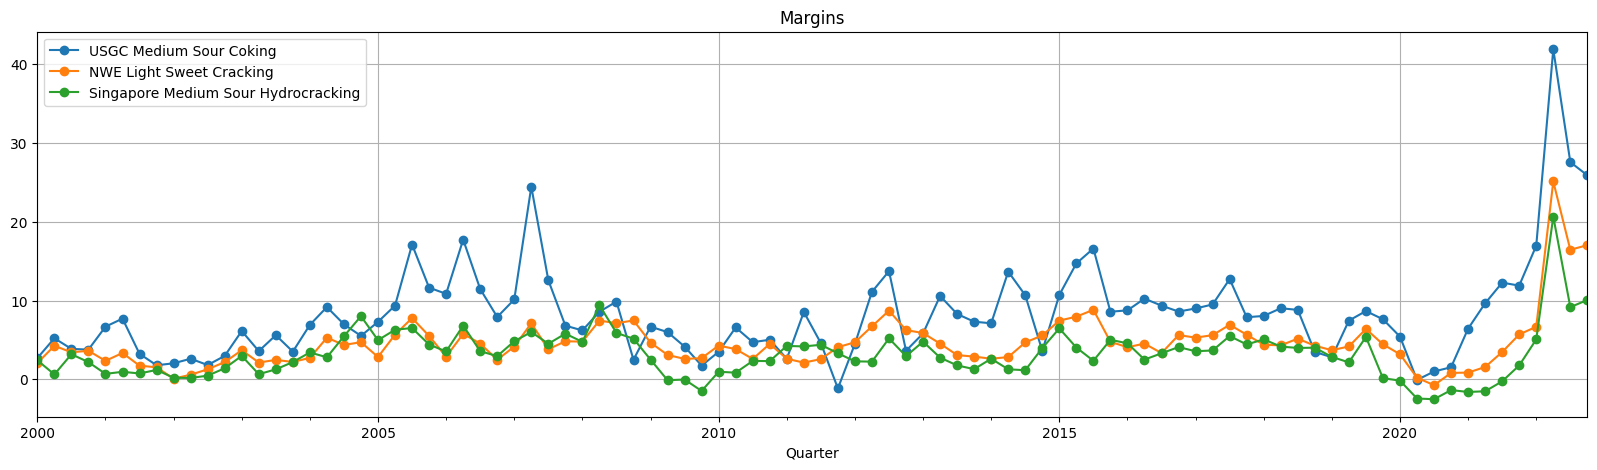

In [199]:
margins.plot(figsize=(20,5),title='Margins',grid=True,marker='o')

# Import Export

In [200]:
df = pd.DataFrame(crude_import_export.T.iloc[-2]).dropna()

<AxesSubplot: title={'center': '2022 Crude Imports, K/BBL/D'}, ylabel='Region,Type'>

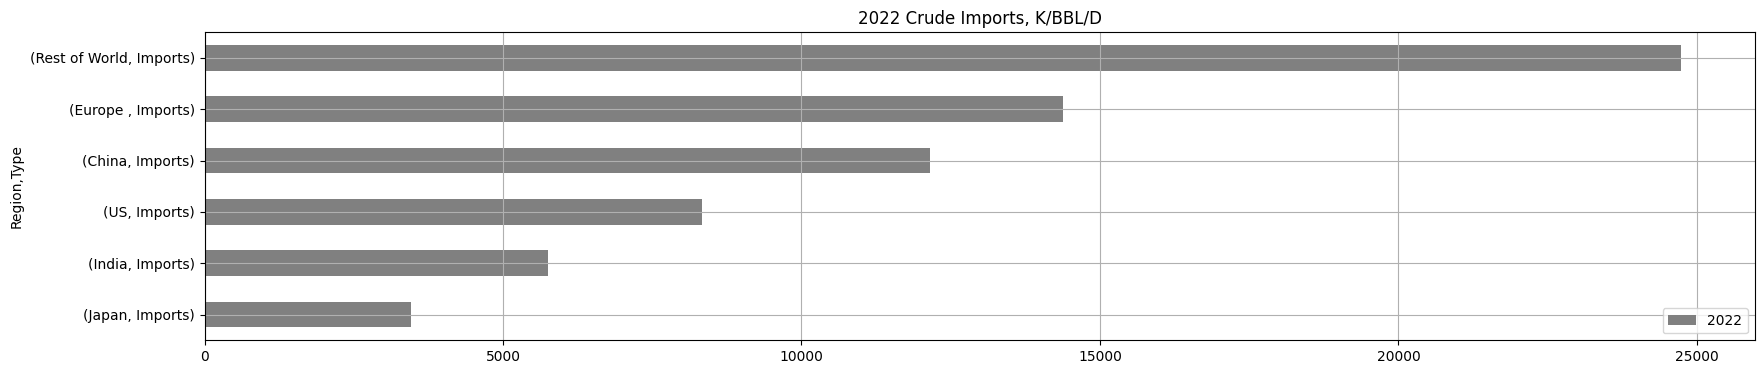

In [201]:
df[df.index.get_level_values(1)=='Imports'].sort_values(2022).plot(kind='barh', figsize=(20,4),rot=0,grid=True, color='grey', title='2022 Crude Imports, K/BBL/D')

<AxesSubplot: title={'center': '2022 Crude Exports, K/BBL/D'}, ylabel='Region,Type'>

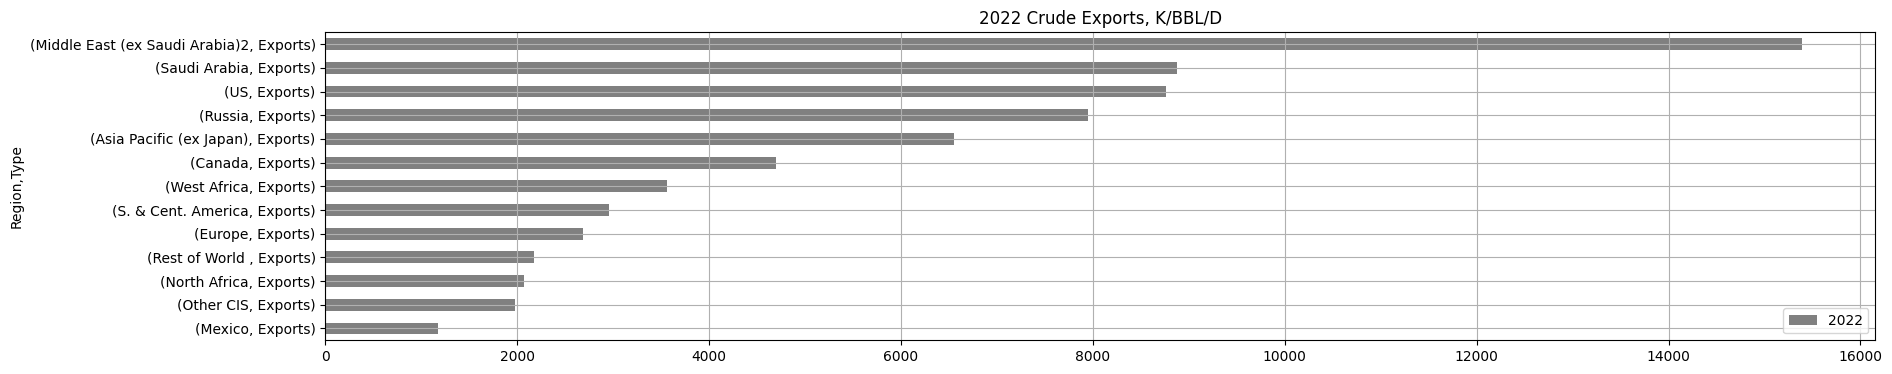

In [202]:
df[df.index.get_level_values(1)=='Exports'].sort_values(2022).plot(kind='barh', figsize=(20,4),rot=0,grid=True, color='grey', title='2022 Crude Exports, K/BBL/D')

# Crude Movement 2022

* What does crude high export/import movement signify?
* Why do certain countries have such movement?

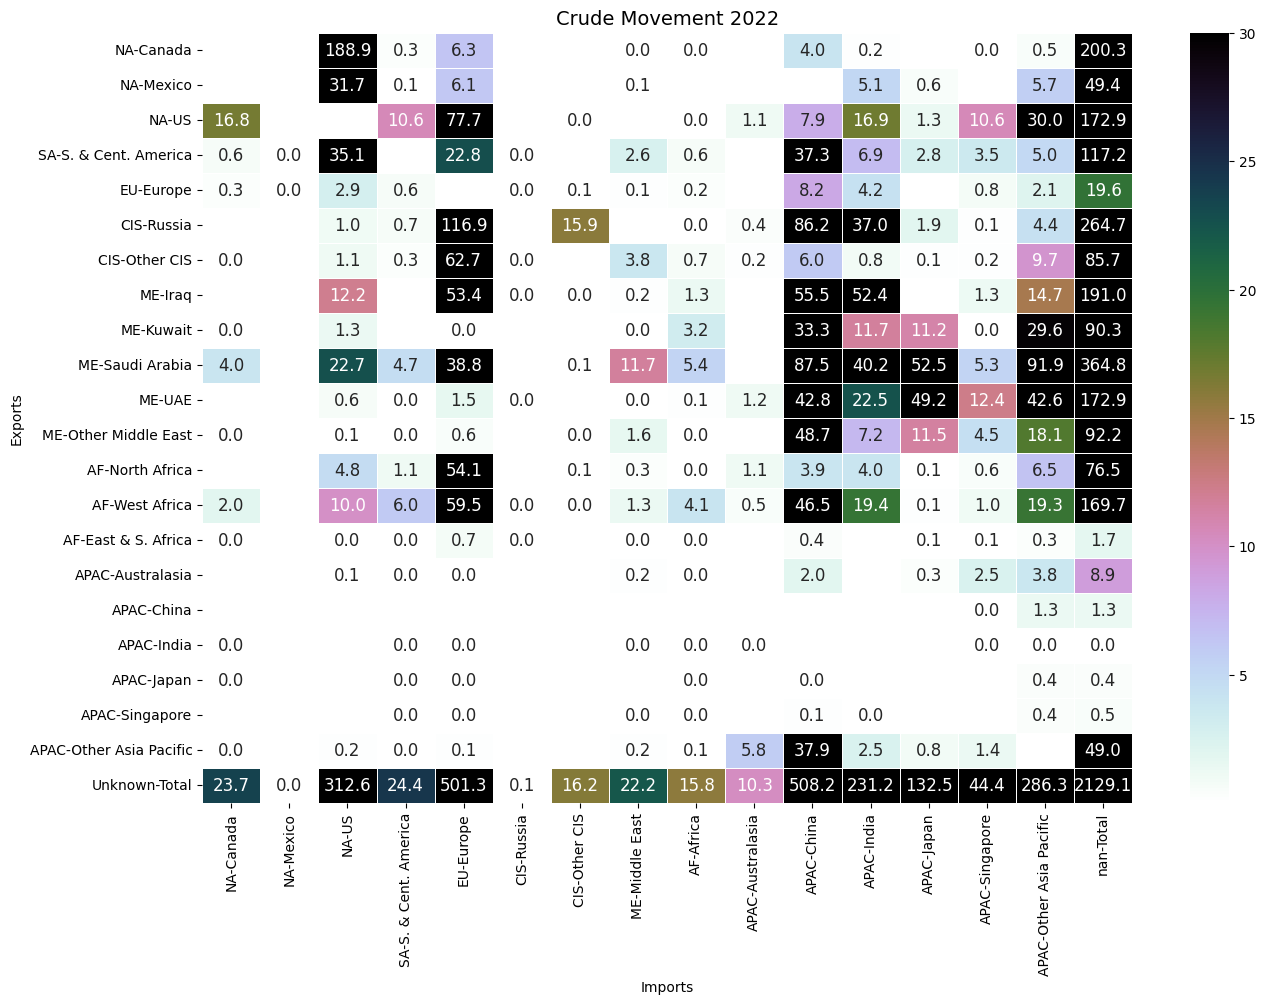

In [203]:


# Plot the correlation matrix using seaborn's heatmap
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(
    crude_movement_2022,
    annot=True, cmap='cubehelix_r', fmt='.1f', linewidths=.5,vmax=30, annot_kws={"fontsize":12})

# Set the title
plt.title('Crude Movement 2022',fontsize=14)
plt.xlabel('Imports')
plt.ylabel('Exports')
# Show the plot
plt.show()

# Product Movement 2022

* What does product high export/import movement signify?
* Why do certain countries have such movement?

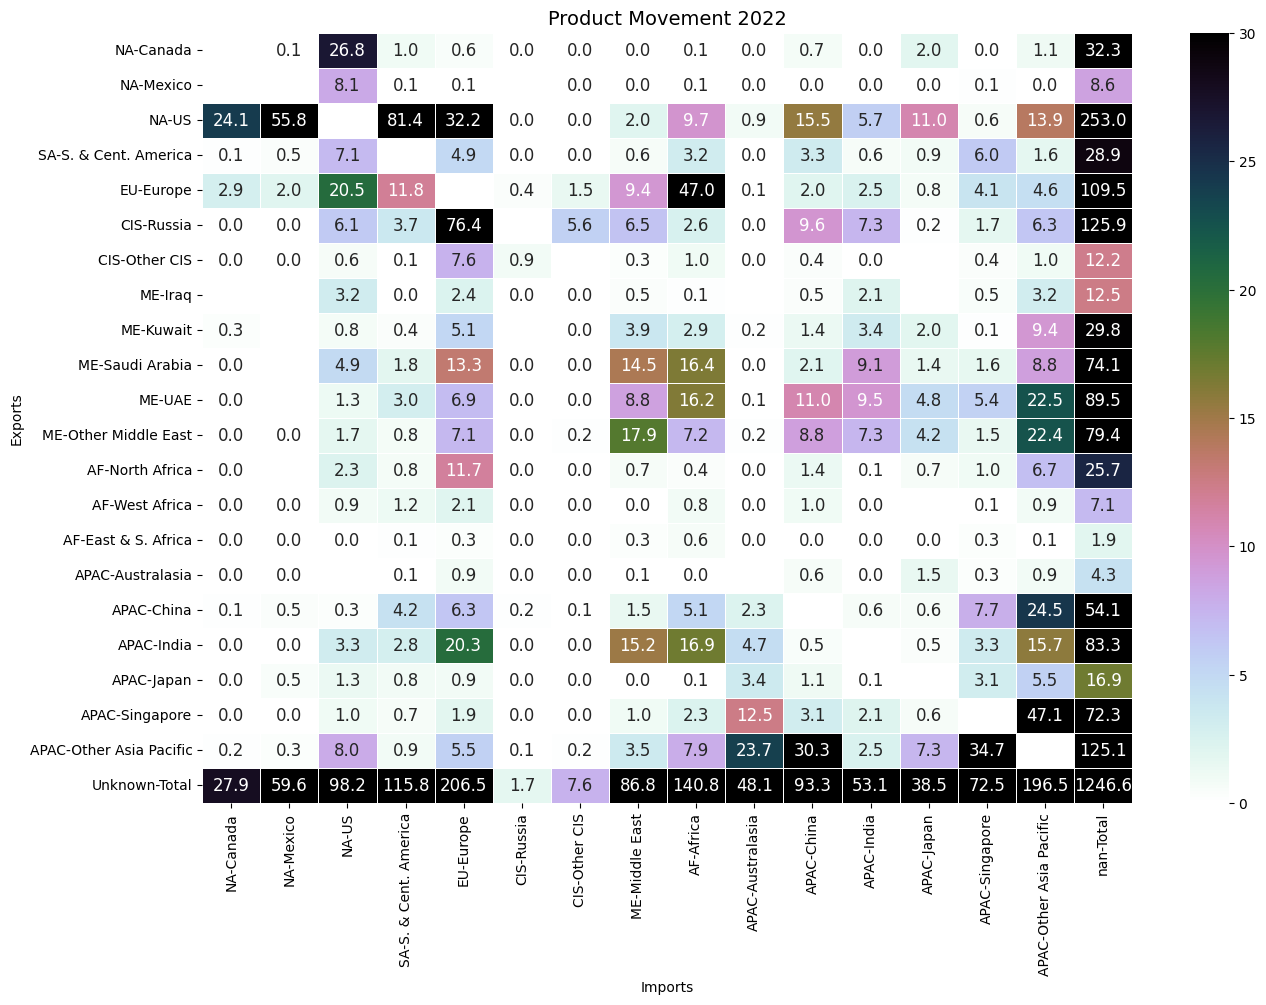

In [204]:


# Plot the correlation matrix using seaborn's heatmap
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(
    product_movement_2022,
    annot=True, cmap='cubehelix_r', fmt='.1f', linewidths=.5,vmax=30, annot_kws={"fontsize":12})

# Set the title
plt.title('Product Movement 2022',fontsize=14)
plt.xlabel('Imports')
plt.ylabel('Exports')
# Show the plot
plt.show()

# Crude Specs & Geography

* [Platts periodic table](https://www.spglobal.com/commodityinsights/plattscontent/_assets/_files/downloads/crude_grades_periodic_table/crude_grades_periodic_table.html)
* [BP crude assays](https://www.bp.com/en/global/bp-trading-and-shipping/documents-and-downloads/technical-downloads/crudes-assays.html)

## Specs

* Scatterplot of acidity vs sulfur, colorized by region, size by production, marker by benchmark - see characteristics of crude per region, overall and by region
* Boxplot of acidity and sulfur by region

In [205]:
ppt = pd.read_csv('Platts-Periodic-Table.csv',header=0)
# ppt.fillna('None',inplace=True)

In [206]:
ppt['Grade_'] = ppt[ppt.Benchmark.notna()]['Grade']

In [207]:

import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import seaborn as sns

# Assuming ppt is your DataFrame
# Map scatter plot to each facet
fig = px.scatter(ppt, x='Sulfur', y='Gravity', color='Region', size='Production', facet_col='Region', facet_col_wrap=3, facet_col_spacing=0.01, facet_row_spacing=0.02, size_max=25,
                 custom_data=['Country','Grade'],
                 title='Sulfur (% of weight) vs Gravity (API) by Region: Lighter = higher gravity',
                 text='Grade_')

fig.update_traces(textposition='top right')

# Update marker and opacity
# fig.update_traces(marker=dict(symbol='circle', opacity=0.8), selector=dict(mode='markers'))
# fig.update_traces(customdata=ppt.loc[:,['Country', 'Grade']])
# fig.update_layout(hovermode="unified")



fig.add_hline(y=34, line_dash="dot", col="all", 
              annotation_text="Med", 
              annotation_position="bottom right",
              line_color='red', 
              annotation=dict(font_size=13), 
            annotation_x=0.95,  # Adjust x-coordinate for offset
            # annotation_y=25,
 
              opacity=0.3)

fig.add_hline(y=25, line_dash="dot", col="all", 
              annotation_text="Hvy", 
              annotation_position="bottom right",
            annotation_x=0.95,  # Adjust x-coordinate for offset
            #   annotation_y=25,
             line_color='purple', 
              opacity=0.3)

fig.add_vline(x=0.6, line_dash="dot", col="all", 
              annotation_text="Sweet", 
              annotation_position="bottom left",
             line_color='pink', 
              opacity=1)




# Update layout
fig.update_layout(height=900, width=850)
fig.update_layout(title_font=dict(size=20))
fig.update_annotations(font_size=15)
# Show plot
fig.update_xaxes(showspikes=True, spikemode="across")
fig.update_yaxes(showspikes=True, spikemode="across")


fig.update_traces(
    hovertemplate="<br>".join([
        "\n",
        "Country: %{customdata[0]}",
        "Grade: %{customdata[1]}",
        "Sulfur: %{x}",
        "Gravity: %{y}",
    ])
)
fig.update_yaxes(title=None,showticklabels=True)

fig.update_layout(
    margin=dict(l=15, r=20, t=60, b=20),
)
fig.update_layout(showlegend=False)
fig.show()


fig.write_html(r"C:\Users\Ryan\Desktop\website\analytic-musings.com\_includes\html_assets\platts.html", full_html=False, include_plotlyjs='cdn')

In [208]:
ppt.Benchmark.unique()

array([nan, 'WAF', 'Urals', 'Dated Brent', 'Oman', 'Dubai', 'AGS'],
      dtype=object)

# Refinery Specs. & Geography

* Overall characteristics
    * Take in a specific slate, output a specific mix. High capex/fixed costs, not easy to reconfigure.
    * Date built reflects initial conditions
    * Made of composition of units. Each refinery is unique.
* Economics
    * Modes: to produce different output mixes based on market conditions.
    * Maintenance/turnaround: minimize opportunity cost. Seasonal. Reduces utilization rate. 
* Types of Units
    * Distilling - No chemical reaction, just physical.
    * Conversion - Cracking, coking, unification reforming. Changes chemistry of the hydrocarbons.
    * Treatment 
    * Blending - To produce specific different grades of products carefully. Put together different chemicals physically. No chemical reactions.
* Terms
    * Catalytic - catalyst
    * Thermal - heat
    * Hydro - uses hydrogen
* Refinery Types
    * Basic topping (simple) - tin-can or teapot in China.
    * Hydroskimming 
    * Cracking - heavy to light
    * Coking - even heavier to light
    * Complex/Full Conversion - With petrochemical producing facilities
* Chemistry
    * Hydrocarbons
        * -ane: no double bond
        * iso-: branches, isomer
    * Naphthenes
        * cyclo-: ring structure, all single bond
    * Olefins
        * two-syllable-ene: double bond, more reactive.
        * one-syllable-ene: double bond, ring structure

# Trade Flows

* Major export hubs
    * US
    * SA
    * Africa
    * ME
    * CIS
* Major import hubs
    * US
    * Europe
    * Asia
* Caveats
    * From ME/CIS to America, across atlantic
    * From America to Asia, across pacific
    * From Africa/Europe/CIS/Asia to Asia

# Trade Route Technicals

# Pricing Mechanisms (Oxford Energy Institute Document)

* Brent
    * EFP - Convert a Brent futures position into a physical contract, either forward or dated Brent.
    * Forward Brent - Forward physical contract, couple months ahead. No loading date. This converts into dated Brent.
    * Dated Brent - Spot or prompt, loading date fixed. 
    * CFD - Some hedging tool for traders given a loading date to fix a price.